In [40]:


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [4]:
#we want to predict if a student will pass(1) or fail(0) an exam based on the number of hours they study

df = pd.DataFrame({
    "hours studied":[1,2,3,4,5,6],
    "passed(1=yes, 0=no)":[0, 0, 0,1, 1, 1]
}
)
df

,hours studied,"passed(1=yes, 0=no)"
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,6,1


In [13]:
X = df["hours studied"]

In [14]:
y = df["passed(1=yes, 0=no)"]
y

0    0
1    0
2    0
3    1
4    1
5    1
Name: passed(1=yes, 0=no), dtype: int64

In [20]:
#if we use linear regression we get the value may be less than 0 or more than 1
#but with logistic regression with sigmoid function we map any number to a value between 0 and 1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
#initialize the weights
w = 0
b = 0

#learning rate and epochs
lr = 0.01
epochs = 10
n = len(X)


In [26]:

#training 
for epoch in range(epochs):
    z = w*X + b
    y_pred = sigmoid(z)

    #compute the gradients
    dw = (1/n)*np.dot(X,(y_pred - y))
    db = (1/n)*np.sum(y_pred - y)

    w -= lr*dw
    b -= lr*db
print(f"trained values:{w:.3f} and {b:.3f}")

def predict(x):
    y = w*x + b
    return sigmoid(y)




    
    


trained values:0.107 and -0.010


In [36]:
test_hours = 3.5
y_predicted = predict(test_hours)
y_predicted

np.float64(0.5905310649396471)

In [38]:
print(f"predicted values :{y_predicted:.2f}")
print(y_predicted, "pass" if y_predicted > 0.5 else "fail")

predicted values :0.59
0.5905310649396471 pass


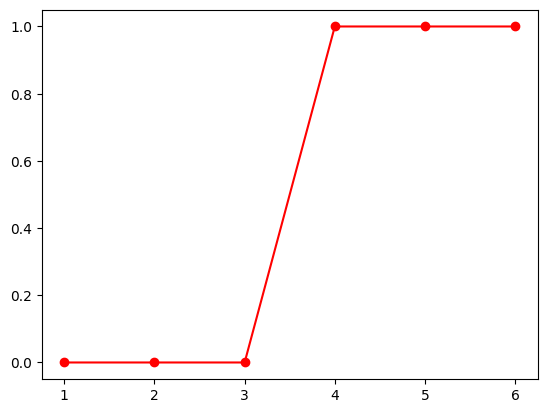

In [42]:
#plot
plt.plot(X, y, color = 'red', marker='o')

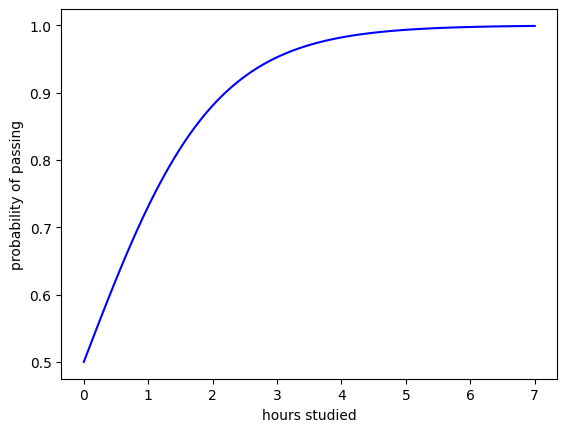

In [49]:
x_line = np.linspace(0, 7, 100)
y_line = sigmoid(x_line)
plt.plot(x_line, y_line, color = 'blue')
plt.xlabel("hours studied")

plt.ylabel("probability of passing")
plt.show()

In [ ]:
#A confusion matrix is a table that shows how a classification model performs by comparing predicted results with actual outcomes.
#It breaks down predictions into true positives, true negatives, false positives, and false negatives, which helps us calculate key metrics like precision, 
#recall, and F1 score. It's especially important when class distribution is imbalanced, as it gives more insight than accuracy alone."
# actually we want to know how many times our model was right and how many times our model was wrong

